SVM

accuracy = 0.9961538461538462
macro F1 score = 0.9961508910406276
Macro Precision: 0.9963369464921488
Micro Precision: 0.9961538461538462
Macro Recall: 0.9961537963461565
Micro Recall: 0.9961538461538462
Micro F1 Score: 0.9961538461538462


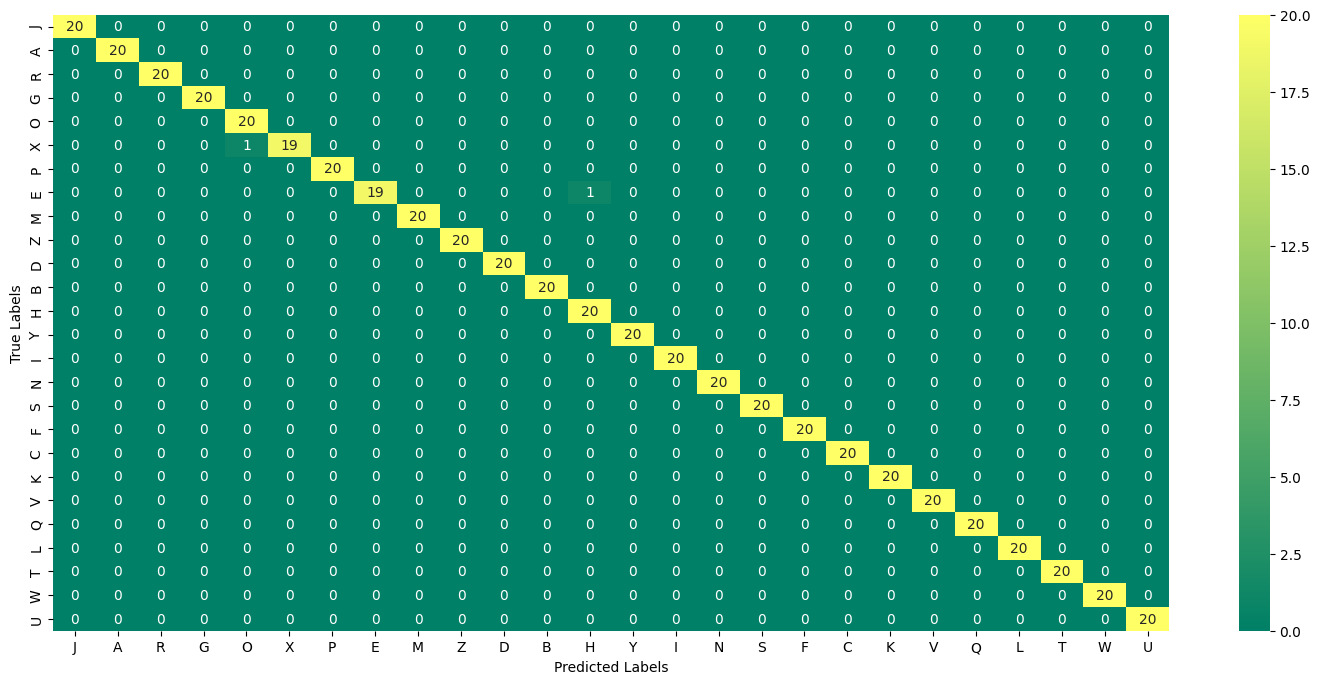

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('final_dataframe.csv')
label = df['class']
df.drop(columns=['class'], inplace=True)

x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=0.2, shuffle=True, stratify=label)

def accuracy(y_true, y_pred):
    correct_predictions = 0
    for yt, yp in zip(y_true, y_pred):
        
        if yt == yp:
            
            correct_predictions += 1
    
    return correct_predictions / len(y_true)

def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
            
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
            
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
            
    return fn

def macro_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    f1 = 0
    for class_ in list(y_true.unique()):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_recall = tp / (tp + fn + 1e-6)
        temp_precision = tp / (tp + fp + 1e-6)
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)
        f1 += temp_f1
        
    f1 /= num_classes
    return f1

def recall(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    recall = 0
    for class_ in list(y_true.unique()):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        temp_recall = tp / (tp + fn + 1e-6)
        recall += temp_recall
    recall /= num_classes
    return recall

def micro_recall(y_true, y_pred):
    tp = 0
    fn = 0
    for class_ in y_true.unique():
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        tp += true_positive(temp_true, temp_pred)
        fn += false_negative(temp_true, temp_pred)
    recall = tp / (tp + fn)
    return recall

def micro_f1(y_true, y_pred):
    P = micro_precision(y_true, y_pred)
    R = micro_recall(y_true, y_pred)
    f1 = 2 * P * R / (P + R)
    return f1

def precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    precision = 0
    for class_ in list(y_true.unique()):
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_precision = tp / (tp + fp + 1e-6)
        precision += temp_precision
    precision /= num_classes
    return precision

def micro_precision(y_true, y_pred):
    tp = 0
    fp = 0
    for class_ in y_true.unique():
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        tp += true_positive(temp_true, temp_pred)
        fp += false_positive(temp_true, temp_pred)
    precision = tp / (tp + fp)
    return precision



model_svm = SVC(random_state= 24 , C=10, gamma=0.1 , kernel='rbf')
model_svm.fit(x_train, y_train)
y_predict_svm = model_svm.predict(x_test)

accuracy_svm = accuracy(y_test, y_predict_svm)
macro_f1_svm = macro_f1(y_test, y_predict_svm) 
macro_precision_svm = precision(y_test, y_predict_svm)
macro_recall_svm = recall(y_test, y_predict_svm)
micro_precision_svm = micro_precision(y_test, y_predict_svm)
micro_recall_svm = micro_recall(y_test, y_predict_svm)
micro_f1_svm = micro_f1(y_test, y_predict_svm)

print(f'accuracy = {accuracy(y_test, y_predict_svm)}')
print(f'macro F1 score = {macro_f1(y_test, y_predict_svm)}')
print(f'Macro Precision: {precision(y_test, y_predict_svm)}')
print(f'Micro Precision: {micro_precision(y_test, y_predict_svm)}')
print(f'Macro Recall: {recall(y_test, y_predict_svm)}')
print(f'Micro Recall: {micro_recall(y_test, y_predict_svm)}')
print(f'Micro F1 Score: {micro_f1(y_test, y_predict_svm)}')

#f_svm = open('svm_classifier.p', 'wb')
#pickle.dump({'model': model_svm}, f_svm)
#f_svm.close()

plt.figure(figsize=(18, 8))
sns.heatmap(metrics.confusion_matrix(y_test, y_predict_svm), annot=True, xticklabels=y_test.unique(), yticklabels=y_test.unique(), cmap='summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()




CNN1




Epoch 1/50


52/52 [==============================] - 3s 14ms/step - loss: 3.1123 - accuracy: 0.1641 - val_loss: 2.8119 - val_accuracy: 0.4279
Epoch 2/50
52/52 [==============================] - 0s 5ms/step - loss: 2.3239 - accuracy: 0.3389 - val_loss: 1.5083 - val_accuracy: 0.6707
Epoch 3/50
52/52 [==============================] - 0s 5ms/step - loss: 1.5318 - accuracy: 0.4706 - val_loss: 0.8721 - val_accuracy: 0.9014
Epoch 4/50
52/52 [==============================] - 0s 5ms/step - loss: 1.1262 - accuracy: 0.6100 - val_loss: 0.5710 - val_accuracy: 0.9351
Epoch 5/50
52/52 [==============================] - 0s 6ms/step - loss: 0.8649 - accuracy: 0.7091 - val_loss: 0.4141 - val_accuracy: 0.9880
Epoch 6/50
52/52 [==============================] - 0s 5ms/step - loss: 0.6682 - accuracy: 0.7686 - val_loss: 0.2920 - val_accuracy: 0.9663
Epoch 7/50
52/52 [==============================] - 0s 6ms/step - loss: 0.5342 - accuracy: 0.8233 - val_loss: 0.2104 - val_accuracy: 0.9663
Epoch 8/50
52/

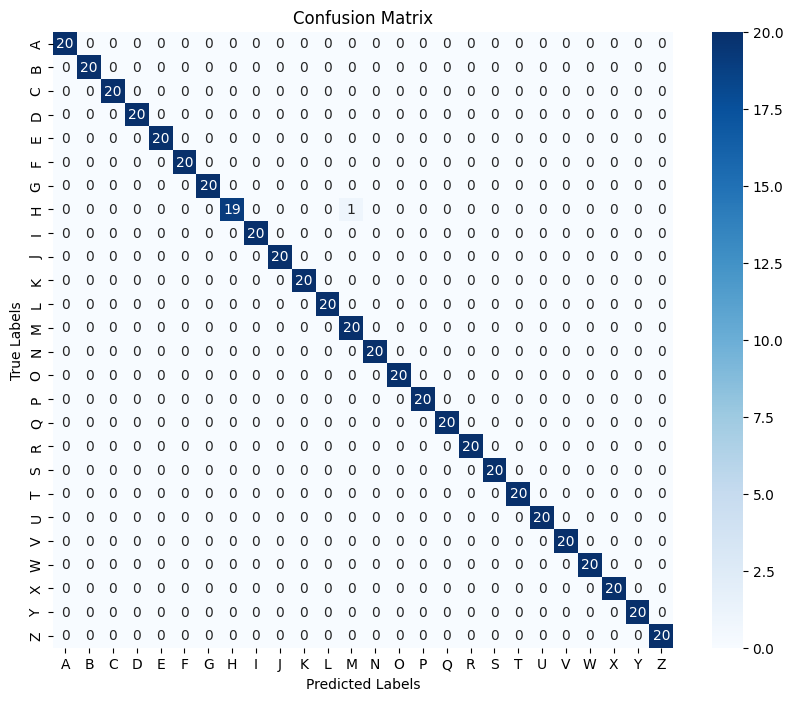

CNN Model Accuracy: 0.9980769230769231
CNN Model Macro F1 Score: 0.9980751705204403
CNN Model Precision: 0.9999999500000024
CNN Model Recall: 0.9999999500000024
CNN Model Micro-Precision: 0.9999999500000024
CNN Model Micro-Recall: 0.9999999500000024
CNN Model Micro-F1 Score: 0.9999994500002525


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_dataframe.csv')
label = df['class']
df.drop(columns=['class'], inplace=True)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(label)

x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(df, y_encoded, test_size=0.2, shuffle=True, stratify=y_encoded)

model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(20, 6)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(26, activation='softmax'))

model_cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn.fit(x_train.values.reshape((x_train.shape[0], 20, 6)), y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

y_predict_cnn = np.argmax(model_cnn.predict(x_test.values.reshape((x_test.shape[0], 20, 6))), axis=-1)

def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

def true_positive(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return tp

def true_negative(y_true, y_pred):
    tn = np.sum((y_true == 0) & (y_pred == 0))
    return tn

def false_positive(y_true, y_pred):
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return fp

def false_negative(y_true, y_pred):
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return fn

def macro_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    f1 = 0
    for class_ in list(np.unique(y_true)):
        temp_true = np.where(y_true == class_, 1, 0)
        temp_pred = np.where(y_pred == class_, 1, 0)
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_recall = tp / (tp + fn + 1e-6)
        temp_precision = tp / (tp + fp + 1e-6)
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)
        f1 += temp_f1

    f1 /= num_classes
    return f1

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-6)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-6)

def micro_precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-6)

def micro_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-6)

def micro_f1(y_true, y_pred):
    P = micro_precision(y_true, y_pred)
    R = micro_recall(y_true, y_pred)
    return 2 * P * R / (P + R + 1e-6)

accuracy_cnn = accuracy(y_test_encoded, y_predict_cnn)
macro_f1_cnn = macro_f1(y_test_encoded, y_predict_cnn)
precision_cnn = precision(y_test_encoded, y_predict_cnn)
recall_cnn = recall(y_test_encoded, y_predict_cnn)
micro_precision_cnn = micro_precision(y_test_encoded, y_predict_cnn)
micro_recall_cnn = micro_recall(y_test_encoded, y_predict_cnn)
micro_f1_cnn = micro_f1(y_test_encoded, y_predict_cnn)



#f_cnn = open('cnn_model.p', 'wb')
#pickle.dump({'model': model_cnn}, f_cnn)
#f_cnn.close()

cm = confusion_matrix(y_test_encoded, y_predict_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f'CNN Model Accuracy: {accuracy_cnn}')
print(f'CNN Model Macro F1 Score: {macro_f1_cnn}')
print(f'CNN Model Precision: {precision_cnn}')
print(f'CNN Model Recall: {recall_cnn}')
print(f'CNN Model Micro-Precision: {micro_precision_cnn}')
print(f'CNN Model Micro-Recall: {micro_recall_cnn}')
print(f'CNN Model Micro-F1 Score: {micro_f1_cnn}')



GNB

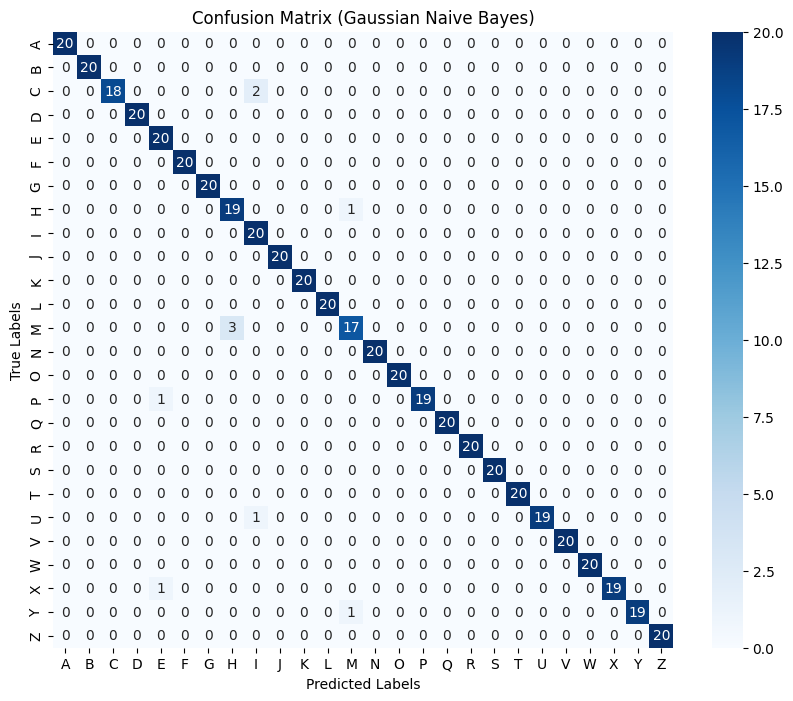

Gaussian Naive Bayes Model Accuracy: 0.9807692307692307
Gaussian Naive Bayes Model Macro F1 Score: 0.9809215514293487
Gaussian Naive Bayes Model Macro Precision: 0.9821933865640357
Gaussian Naive Bayes Model Macro Recall: 0.9807691817307715
Gaussian Naive Bayes Model Micro Precision: 0.9999999500000024
Gaussian Naive Bayes Model Micro Recall: 0.9999999500000024
Gaussian Naive Bayes Model Micro F1 Score: 0.9999994500002525


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('final_dataframe.csv')
label = df['class']
df.drop(columns=['class'], inplace=True)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(label)

x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(df, y_encoded, test_size=0.2, shuffle=True, stratify=y_encoded)

model_nb = GaussianNB()

model_nb.fit(x_train, y_train_encoded)

y_predict_nb = model_nb.predict(x_test)

def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

def true_positive(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return tp

def true_negative(y_true, y_pred):
    tn = np.sum((y_true == 0) & (y_pred == 0))
    return tn

def false_positive(y_true, y_pred):
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return fp

def false_negative(y_true, y_pred):
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return fn

def macro_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    f1 = 0
    for class_ in list(np.unique(y_true)):
        temp_true = np.where(y_true == class_, 1, 0)
        temp_pred = np.where(y_pred == class_, 1, 0)
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_recall = tp / (tp + fn + 1e-6)
        temp_precision = tp / (tp + fp + 1e-6)
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)
        f1 += temp_f1

    f1 /= num_classes
    return f1

def precision(y_true, y_pred, class_label):
    tp = np.sum((y_true == class_label) & (y_pred == class_label))
    fp = np.sum((y_true != class_label) & (y_pred == class_label))
    return tp / (tp + fp + 1e-6)

def recall(y_true, y_pred, class_label):
    tp = np.sum((y_true == class_label) & (y_pred == class_label))
    fn = np.sum((y_true == class_label) & (y_pred != class_label))
    return tp / (tp + fn + 1e-6)

def macro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    precision_sum= 0
    for class_ in list(np.unique(y_true)):
        precision_sum += precision(y_true, y_pred, class_)
    return precision_sum / num_classes

def macro_recall(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    recall_ = 0
    for class_ in list(np.unique(y_true)):
        recall_ += recall(y_true, y_pred, class_)
    return recall_ / num_classes

def micro_precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-6)

def micro_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-6)

def micro_f1(y_true, y_pred):
    P = micro_precision(y_true, y_pred)
    R = micro_recall(y_true, y_pred)
    return 2 * P * R / (P + R + 1e-6)

accuracy_nb = accuracy(y_test_encoded, y_predict_nb)
macro_f1_nb = macro_f1(y_test_encoded, y_predict_nb)
macro_precision_nb = macro_precision(y_test_encoded, y_predict_nb)
macro_recall_nb = macro_recall(y_test_encoded, y_predict_nb)
micro_precision_nb = micro_precision(y_test_encoded, y_predict_nb)
micro_recall_nb = micro_recall(y_test_encoded, y_predict_nb)
micro_f1_nb = micro_f1(y_test_encoded, y_predict_nb)

cm_nb = confusion_matrix(y_test_encoded, y_predict_nb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Gaussian Naive Bayes)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


print(f'Gaussian Naive Bayes Model Accuracy: {accuracy_nb}')
print(f'Gaussian Naive Bayes Model Macro F1 Score: {macro_f1_nb}')
print(f'Gaussian Naive Bayes Model Macro Precision: {macro_precision_nb}')
print(f'Gaussian Naive Bayes Model Macro Recall: {macro_recall_nb}')
print(f'Gaussian Naive Bayes Model Micro Precision: {micro_precision_nb}')
print(f'Gaussian Naive Bayes Model Micro Recall: {micro_recall_nb}')
print(f'Gaussian Naive Bayes Model Micro F1 Score: {micro_f1_nb}')

#f_gnb = open('gaussian_naive_bayes.p', 'wb')
#pickle.dump({'model': model_nb}, f_gnb)
#f_gnb.close()



CNN2

Epoch 1/40
52/52 [==============================] - 3s 13ms/step - loss: 1.3847 - accuracy: 0.6911 - val_loss: 2.8927 - val_accuracy: 0.8197
Epoch 2/40
52/52 [==============================] - 0s 6ms/step - loss: 0.3171 - accuracy: 0.9688 - val_loss: 2.6195 - val_accuracy: 0.9808
Epoch 3/40
52/52 [==============================] - 0s 7ms/step - loss: 0.1392 - accuracy: 0.9874 - val_loss: 2.2923 - val_accuracy: 0.9952
Epoch 4/40
52/52 [==============================] - 0s 7ms/step - loss: 0.0907 - accuracy: 0.9922 - val_loss: 1.9330 - val_accuracy: 0.9952
Epoch 5/40
52/52 [==============================] - 0s 6ms/step - loss: 0.0541 - accuracy: 0.9976 - val_loss: 1.4695 - val_accuracy: 0.9952
Epoch 6/40
52/52 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9976 - val_loss: 0.9657 - val_accuracy: 0.9976
Epoch 7/40
52/52 [==============================] - 0s 6ms/step - loss: 0.0248 - accuracy: 0.9994 - val_loss: 0.5539 - val_accuracy: 0.9976
Epoch 8/40
52/52 [=

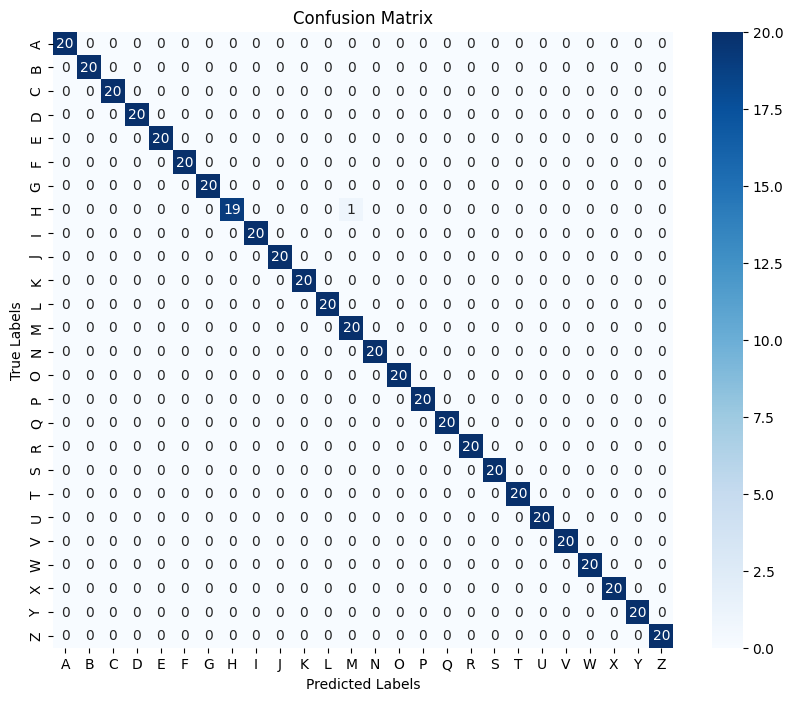

CNN Model Accuracy: 0.9980769230769231
CNN Model Macro F1 Score: 0.9980751705204403
CNN Model Precision: 0.9999999500000024
CNN Model Recall: 0.9999999500000024
CNN Model Micro-Precision: 0.9999999500000024
CNN Model Micro-Recall: 0.9999999500000024
CNN Model Micro-F1 Score: 0.9999994500002525


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import pickle

df = pd.read_csv('final_dataframe.csv')
label = df['class']
df.drop(columns=['class'], inplace=True)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(label)

x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(df, y_encoded, test_size=0.2, shuffle=True, stratify=y_encoded)

model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(20, 6)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Conv1D(128, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(26, activation='softmax'))

model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_cnn.fit(x_train.values.reshape((x_train.shape[0], 20, 6)), y_train_encoded, epochs=40, batch_size=32, validation_split=0.2)

y_predict_cnn2 = np.argmax(model_cnn.predict(x_test.values.reshape((x_test.shape[0], 20, 6))), axis=-1)

def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

def true_positive(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return tp

def true_negative(y_true, y_pred):
    tn = np.sum((y_true == 0) & (y_pred == 0))
    return tn

def false_positive(y_true, y_pred):
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return fp

def false_negative(y_true, y_pred):
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return fn

def macro_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    f1 = 0
    for class_ in list(np.unique(y_true)):
        temp_true = np.where(y_true == class_, 1, 0)
        temp_pred = np.where(y_pred == class_, 1, 0)
        tp = true_positive(temp_true, temp_pred)
        fn = false_negative(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_recall = tp / (tp + fn + 1e-6)
        temp_precision = tp / (tp + fp + 1e-6)
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)
        f1 += temp_f1

    f1 /= num_classes
    return f1
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-6)

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-6)

def micro_precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp + 1e-6)

def micro_recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn + 1e-6)

def micro_f1(y_true, y_pred):
    P = micro_precision(y_true, y_pred)
    R = micro_recall(y_true, y_pred)
    return 2 * P * R / (P + R + 1e-6)

accuracy_cnn2 = accuracy(y_test_encoded, y_predict_cnn2)
macro_f1_cnn2 = macro_f1(y_test_encoded, y_predict_cnn2)
precision_cnn2 = precision(y_test_encoded, y_predict_cnn2)
recall_cnn2 = recall(y_test_encoded, y_predict_cnn2)
micro_precision_cnn2 = micro_precision(y_test_encoded, y_predict_cnn2)
micro_recall_cnn2 = micro_recall(y_test_encoded, y_predict_cnn2)
micro_f1_cnn2 = micro_f1(y_test_encoded, y_predict_cnn2)

cm = confusion_matrix(y_test_encoded, y_predict_cnn2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f'CNN Model Accuracy: {accuracy_cnn2}')
print(f'CNN Model Macro F1 Score: {macro_f1_cnn2}')
print(f'CNN Model Precision: {precision_cnn2}')
print(f'CNN Model Recall: {recall_cnn2}')
print(f'CNN Model Micro-Precision: {micro_precision_cnn2}')
print(f'CNN Model Micro-Recall: {micro_recall_cnn2}')
print(f'CNN Model Micro-F1 Score: {micro_f1_cnn2}')

#f_cnn = open('cnn_2.p', 'wb')
#pickle.dump({'model': model_cnn}, f_cnn)
#f_cnn.close()



adaboost

C:\Users\Shaili\AppData\Local\Temp\ipykernel_14844\1601918738.py:70: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  tp = np.sum(true_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
C:\Users\Shaili\AppData\Local\Temp\ipykernel_14844\1601918738.py:71: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  fp = np.sum(false_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
C:\Users\Shaili\AppData\Local\Temp\ipykernel_14844\1601918738.py:53: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  tp = np.sum(true_positive(y_true, y_pred, class_label) for clas

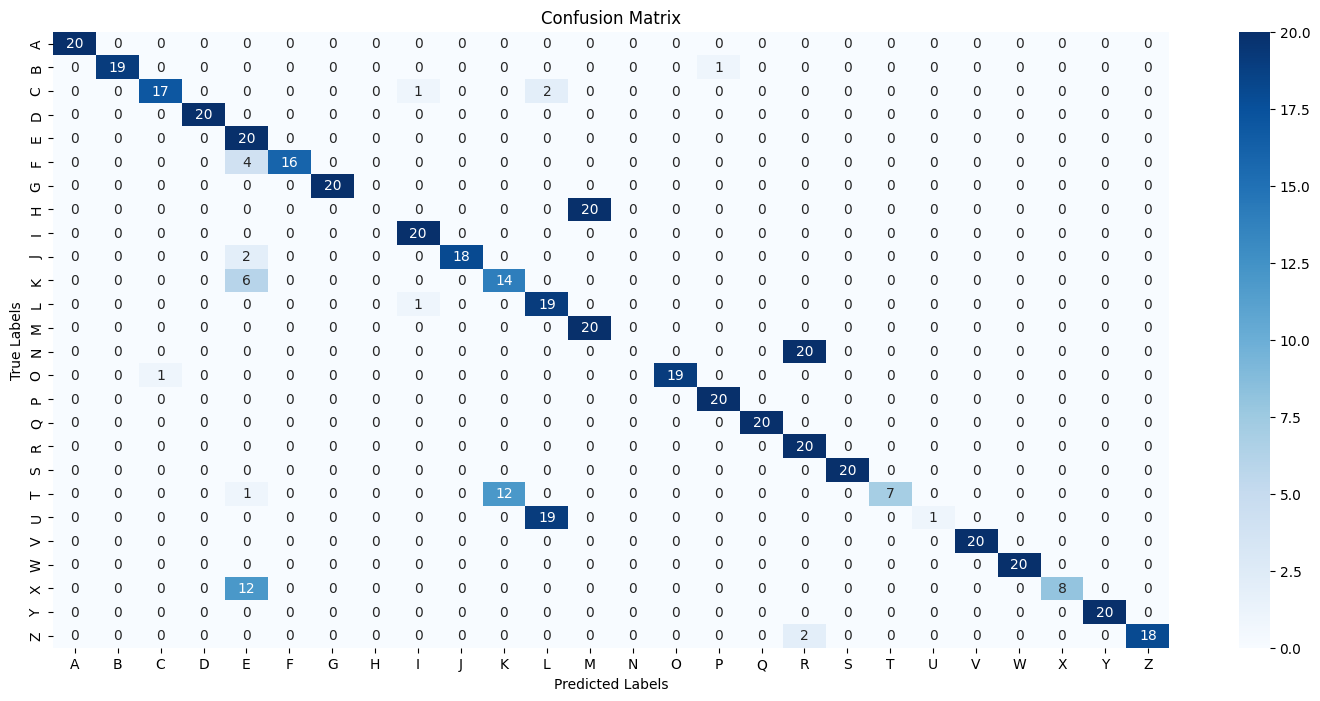

AdaBoost Model Accuracy: 0.8
AdaBoost Model Macro F1 Score: 0.7657494566328729
AdaBoost Model Precision: 0.9999999473684238
AdaBoost Model Recall: 0.7999999600000021
AdaBoost Model Micro-Precision: 0.7999999984615385
AdaBoost Model Micro-Recall: 0.8
AdaBoost Model Micro-F1 Score: 0.7999994992310818


In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

def true_positive(y_true, y_pred, class_label=1):
    tp = np.sum((y_true == class_label) & (y_pred == class_label))
    return tp

def true_negative(y_true, y_pred, class_label=0):
    tn = np.sum((y_true == class_label) & (y_pred == class_label))
    return tn

def false_positive(y_true, y_pred, class_label=0):
    fp = np.sum((y_true != class_label) & (y_pred == class_label))
    return fp

def false_negative(y_true, y_pred, class_label=1):
    fn = np.sum((y_true == class_label) & (y_pred != class_label))
    return fn

def macro_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    f1 = 0
    for class_label in np.unique(y_true):
        tp = true_positive(y_true, y_pred, class_label)
        fn = false_negative(y_true, y_pred, class_label)
        fp = false_positive(y_true, y_pred, class_label)
        temp_recall = tp / (tp + fn + 1e-6)
        temp_precision = tp / (tp + fp + 1e-6)
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)
        f1 += temp_f1
    f1 /= num_classes
    return f1

def recall(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    recall_ = 0
    for class_label in np.unique(y_true):
        tp = true_positive(y_true, y_pred, class_label)
        fn = false_negative(y_true, y_pred, class_label)
        temp_recall = tp / (tp + fn + 1e-6)
        recall_ += temp_recall
    recall_ /= num_classes
    return recall_

def micro_recall(y_true, y_pred):
    tp = np.sum(true_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    fn = np.sum(false_negative(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    recall = tp / (tp + fn)
    return recall

def micro_f1(y_true, y_pred):
    P = micro_precision(y_true, y_pred)
    R = micro_recall(y_true, y_pred)
    f1 = 2 * P * R / (P + R + 1e-6)
    return f1

def precision(y_true, y_pred, class_label=1):
    tp = true_positive(y_true, y_pred, class_label)
    fp = false_positive(y_true, y_pred, class_label)
    return tp / (tp + fp + 1e-6)

def micro_precision(y_true, y_pred):
    tp = np.sum(true_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    fp = np.sum(false_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    precision = tp / (tp + fp + 1e-6)
    return precision

df = pd.read_csv('final_dataframe.csv')
label = df['class']
df.drop(columns=['class'], inplace=True)

label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)

x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=0.2, shuffle=True, stratify=label)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
}

model_adaboost = AdaBoostClassifier(random_state=24)

grid_search = GridSearchCV(model_adaboost, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_


best_adaboost_model = AdaBoostClassifier(**best_params, random_state=24)

best_adaboost_model.fit(x_train, y_train)

y_predict_adaboost = best_adaboost_model.predict(x_test)

accuracy_adaboost = accuracy(y_test, y_predict_adaboost)
macro_f1_adaboost = macro_f1(y_test, y_predict_adaboost)
macro_precision_adaboost = precision(y_test, y_predict_adaboost)
macro_recall_adaboost = recall(y_test, y_predict_adaboost)
micro_precision_adaboost = micro_precision(y_test, y_predict_adaboost)
micro_recall_adaboost = micro_recall(y_test, y_predict_adaboost)
micro_f1_adaboost = micro_f1(y_test, y_predict_adaboost)



cm = confusion_matrix(y_test, y_predict_adaboost)
plt.figure(figsize=(18, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f'AdaBoost Model Accuracy: {accuracy_adaboost}')
print(f'AdaBoost Model Macro F1 Score: {macro_f1_adaboost}')
print(f'AdaBoost Model Precision: {macro_precision_adaboost}')
print(f'AdaBoost Model Recall: {macro_recall_adaboost}')
print(f'AdaBoost Model Micro-Precision: {micro_precision_adaboost}')
print(f'AdaBoost Model Micro-Recall: {micro_recall_adaboost}')
print(f'AdaBoost Model Micro-F1 Score: {micro_f1_adaboost}')

#f_ada = open('adaboost.p', 'wb')
#pickle.dump({'model': model_adaboost}, f_ada)
#f_ada.close()

random forest

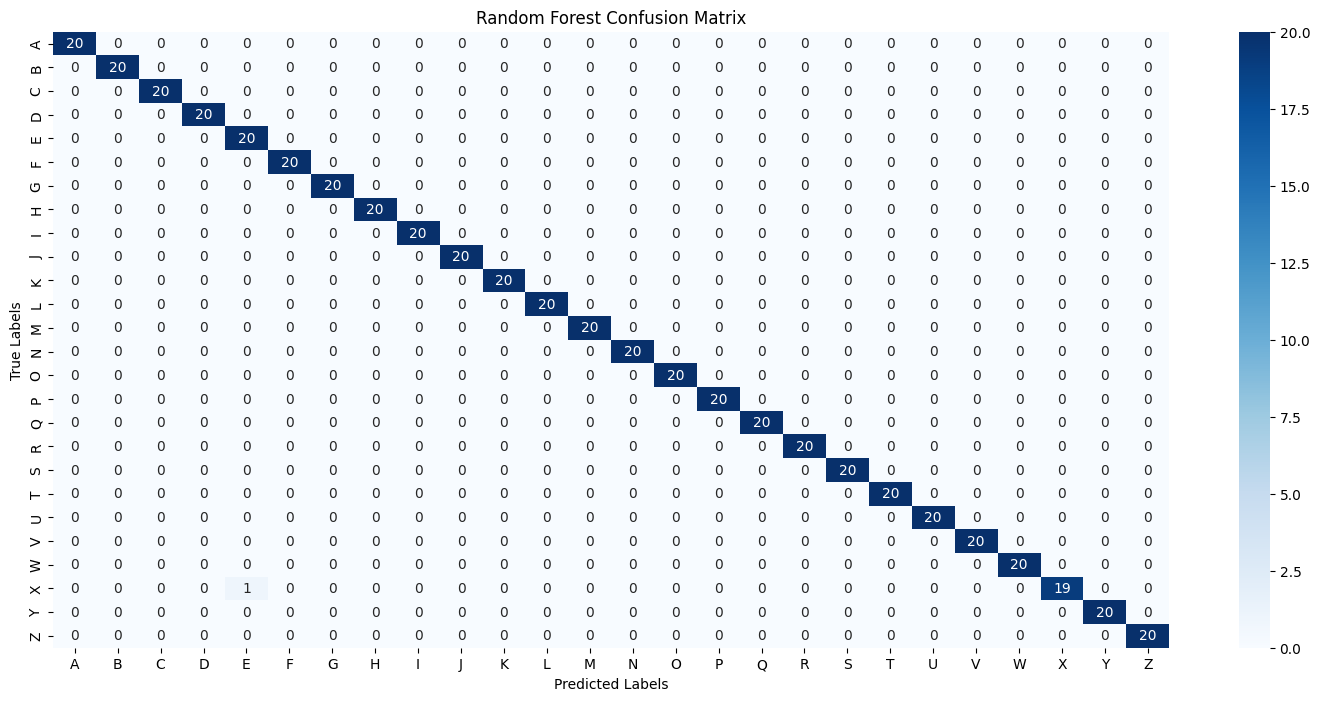

Random Forest Model Accuracy: 0.9980769230769231
Random Forest Model Macro F1 Score: 0.9980757204021745
Random Forest Model Macro Precision: 0.9981684981684982
Random Forest Model Macro Recall: 0.9980769230769231
Random Forest Model Micro Precision: 0.9980769230769231
Random Forest Model Micro Recall: 0.9980769230769231
Random Forest Model Micro F1 Score: 0.9980769230769231


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

def true_positive(y_true, y_pred, class_label=1):
    tp = np.sum((y_true == class_label) & (y_pred == class_label))
    return tp

def true_negative(y_true, y_pred, class_label=0):
    tn = np.sum((y_true == class_label) & (y_pred == class_label))
    return tn

def false_positive(y_true, y_pred, class_label=0):
    fp = np.sum((y_true != class_label) & (y_pred == class_label))
    return fp

def false_negative(y_true, y_pred, class_label=1):
    fn = np.sum((y_true == class_label) & (y_pred != class_label))
    return fn

def macro_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    f1 = 0
    for class_label in np.unique(y_true):
        tp = true_positive(y_true, y_pred, class_label)
        fn = false_negative(y_true, y_pred, class_label)
        fp = false_positive(y_true, y_pred, class_label)
        temp_recall = tp / (tp + fn + 1e-6)
        temp_precision = tp / (tp + fp + 1e-6)
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)
        f1 += temp_f1
    f1 /= num_classes
    return f1

def recall(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    recall_ = 0
    for class_label in np.unique(y_true):
        tp = true_positive(y_true, y_pred, class_label)
        fn = false_negative(y_true, y_pred, class_label)
        temp_recall = tp / (tp + fn + 1e-6)
        recall_ += temp_recall
    recall_ /= num_classes
    return recall_

def micro_recall(y_true, y_pred):
    tp = np.sum(true_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    fn = np.sum(false_negative(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    recall = tp / (tp + fn)
    return recall

def micro_f1(y_true, y_pred):
    P = micro_precision(y_true, y_pred)
    R = micro_recall(y_true, y_pred)
    f1 = 2 * P * R / (P + R + 1e-6)
    return f1

def precision(y_true, y_pred, class_label=1):
    tp = true_positive(y_true, y_pred, class_label)
    fp = false_positive(y_true, y_pred, class_label)
    return tp / (tp + fp + 1e-6)

def micro_precision(y_true, y_pred):
    tp = np.sum(true_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    fp = np.sum(false_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    precision = tp / (tp + fp + 1e-6)
    return precision

df = pd.read_csv('final_dataframe.csv')
label = df['class']
df.drop(columns=['class'], inplace=True)

label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)

x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=0.2, shuffle=True, stratify=label)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

model_rf = RandomForestClassifier(random_state=24)

grid_search = GridSearchCV(model_rf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

best_rf_model = RandomForestClassifier(**best_params, random_state=24)

best_rf_model.fit(x_train, y_train)

y_predict_rf = best_rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_predict_rf)
macro_f1_rf = f1_score(y_test, y_predict_rf, average='macro')
macro_precision_rf = precision_score(y_test, y_predict_rf, average='macro')
macro_recall_rf = recall_score(y_test, y_predict_rf, average='macro')
micro_precision_rf = precision_score(y_test, y_predict_rf, average='micro')
micro_recall_rf = recall_score(y_test, y_predict_rf, average='micro')
micro_f1_rf = f1_score(y_test, y_predict_rf, average='micro')

cm_rf = confusion_matrix(y_test, y_predict_rf)
plt.figure(figsize=(18, 8))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f'Random Forest Model Accuracy: {accuracy_rf}')
print(f'Random Forest Model Macro F1 Score: {macro_f1_rf}')
print(f'Random Forest Model Macro Precision: {macro_precision_rf}')
print(f'Random Forest Model Macro Recall: {macro_recall_rf}')
print(f'Random Forest Model Micro Precision: {micro_precision_rf}')
print(f'Random Forest Model Micro Recall: {micro_recall_rf}')
print(f'Random Forest Model Micro F1 Score: {micro_f1_rf}')
#f_rf = open('random_forest_classifier.p', 'wb')
#pickle.dump({'model': model_rf}, f_rf)
#f_rf.close()


XGBoost

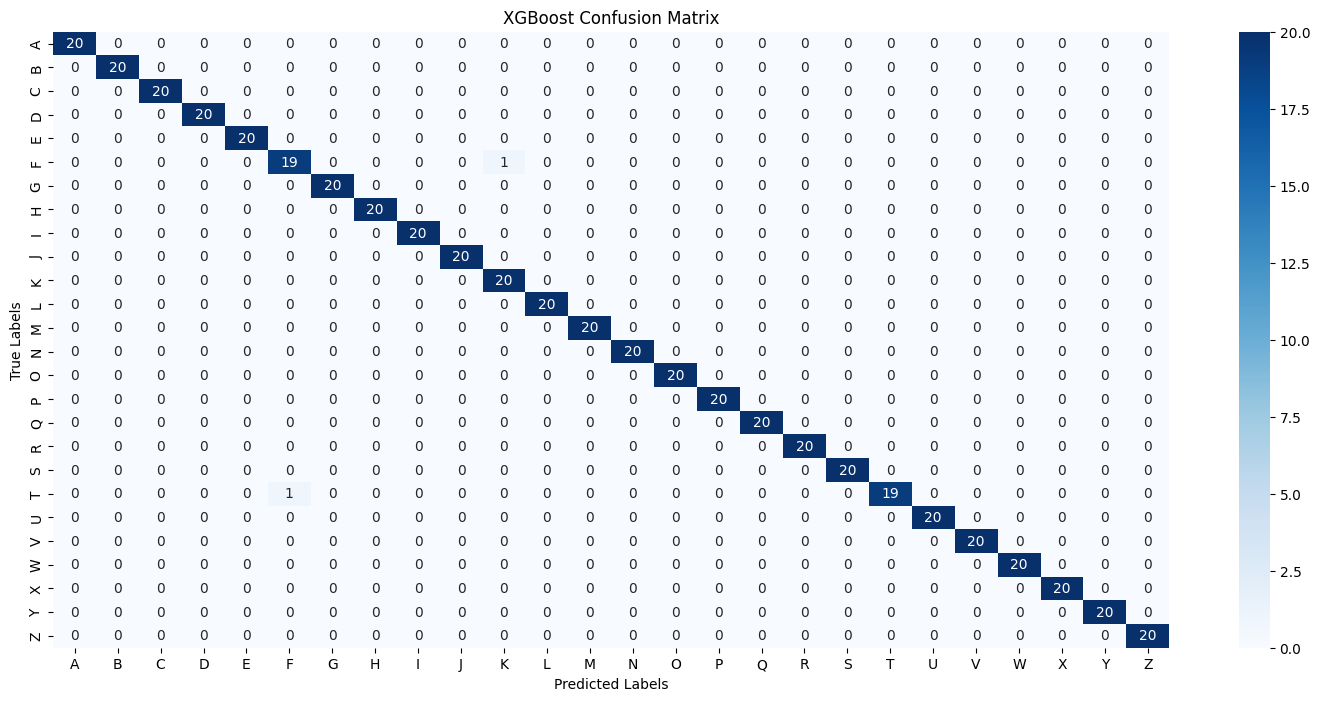

XGBoost Model Accuracy: 0.9961538461538462
XGBoost Model Macro F1 Score: 0.9961526434790975
XGBoost Model Macro Precision: 0.9962454212454213
XGBoost Model Macro Recall: 0.9961538461538461
XGBoost Model Micro Precision: 0.9961538461538462
XGBoost Model Micro Recall: 0.9961538461538462
XGBoost Model Micro F1 Score: 0.9961538461538462


In [7]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

def true_positive(y_true, y_pred, class_label=1):
    tp = np.sum((y_true == class_label) & (y_pred == class_label))
    return tp

def true_negative(y_true, y_pred, class_label=0):
    tn = np.sum((y_true == class_label) & (y_pred == class_label))
    return tn

def false_positive(y_true, y_pred, class_label=0):
    fp = np.sum((y_true != class_label) & (y_pred == class_label))
    return fp

def false_negative(y_true, y_pred, class_label=1):
    fn = np.sum((y_true == class_label) & (y_pred != class_label))
    return fn

def macro_f1(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    f1 = 0
    for class_label in np.unique(y_true):
        tp = true_positive(y_true, y_pred, class_label)
        fn = false_negative(y_true, y_pred, class_label)
        fp = false_positive(y_true, y_pred, class_label)
        temp_recall = tp / (tp + fn + 1e-6)
        temp_precision = tp / (tp + fp + 1e-6)
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)
        f1 += temp_f1
    f1 /= num_classes
    return f1

def recall(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    recall_ = 0
    for class_label in np.unique(y_true):
        tp = true_positive(y_true, y_pred, class_label)
        fn = false_negative(y_true, y_pred, class_label)
        temp_recall = tp / (tp + fn + 1e-6)
        recall_ += temp_recall
    recall_ /= num_classes
    return recall_

def micro_recall(y_true, y_pred):
    tp = np.sum(true_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    fn = np.sum(false_negative(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    recall = tp / (tp + fn)
    return recall

def micro_f1(y_true, y_pred):
    P = micro_precision(y_true, y_pred)
    R = micro_recall(y_true, y_pred)
    f1 = 2 * P * R / (P + R + 1e-6)
    return f1

def precision(y_true, y_pred, class_label=1):
    tp = true_positive(y_true, y_pred, class_label)
    fp = false_positive(y_true, y_pred, class_label)
    return tp / (tp + fp + 1e-6)

def micro_precision(y_true, y_pred):
    tp = np.sum(true_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    fp = np.sum(false_positive(y_true, y_pred, class_label) for class_label in np.unique(y_true))
    precision = tp / (tp + fp + 1e-6)
    return precision

df = pd.read_csv('final_dataframe.csv')
label = df['class']
df.drop(columns=['class'], inplace=True)

label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label)

x_train, x_test, y_train, y_test = train_test_split(df, label, test_size=0.2, shuffle=True, stratify=label)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
}

model_xgboost = xgb.XGBClassifier(random_state=24)

grid_search = GridSearchCV(model_xgboost, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

best_xgboost_model = xgb.XGBClassifier(**best_params, random_state=24)

best_xgboost_model.fit(x_train, y_train)

y_predict_xgboost = best_xgboost_model.predict(x_test)

accuracy_xgboost = accuracy_score(y_test, y_predict_xgboost)
macro_f1_xgboost = f1_score(y_test, y_predict_xgboost, average='macro')
macro_precision_xgboost = precision_score(y_test, y_predict_xgboost, average='macro')
macro_recall_xgboost = recall_score(y_test, y_predict_xgboost, average='macro')
micro_precision_xgboost = precision_score(y_test, y_predict_xgboost, average='micro')
micro_recall_xgboost = recall_score(y_test, y_predict_xgboost, average='micro')
micro_f1_xgboost = f1_score(y_test, y_predict_xgboost, average='micro')

cm_xgboost = confusion_matrix(y_test, y_predict_xgboost)
plt.figure(figsize=(18, 8))
sns.heatmap(cm_xgboost, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f'XGBoost Model Accuracy: {accuracy_xgboost}')
print(f'XGBoost Model Macro F1 Score: {macro_f1_xgboost}')
print(f'XGBoost Model Macro Precision: {macro_precision_xgboost}')
print(f'XGBoost Model Macro Recall: {macro_recall_xgboost}')
print(f'XGBoost Model Micro Precision: {micro_precision_xgboost}')
print(f'XGBoost Model Micro Recall: {micro_recall_xgboost}')
print(f'XGBoost Model Micro F1 Score: {micro_f1_xgboost}')

#f_xg = open('xgboost.p', 'wb')
#pickle.dump({'model': model_xgboost}, f_xg)
#f_xg.close()


In [13]:
import pandas as pd

metrics = ['Accuracy', 'Macro F1 Score', 'Macro Precision', 'Macro Recall', 'Micro Precision', 'Micro Recall', 'Micro F1 Score']
df_scores = pd.DataFrame(columns=metrics)
model_names = ['SVM Model', 'CNN Model', 'Gaussian Naive Bayes', 'CNN2 Model','Adaboost','Random Forest','XGBoost']

svm_values = [accuracy_svm , macro_f1_svm,macro_precision_svm,macro_recall_svm,micro_precision_svm,micro_recall_svm ,micro_f1_svm]

cnn_values = [accuracy_cnn , macro_f1_cnn,precision_cnn,recall_cnn,micro_precision_cnn,micro_recall_cnn ,micro_f1_cnn]


nb_values = [accuracy_nb , macro_f1_nb,macro_precision_nb,macro_recall_nb,micro_precision_nb,micro_recall_nb ,micro_f1_nb]


cnn2_values= [accuracy_cnn2 , macro_f1_cnn2,precision_cnn2,recall_cnn2,micro_precision_cnn2,micro_recall_cnn2 ,micro_f1_cnn2]
adaboost_values = [accuracy_adaboost, macro_f1_adaboost, macro_precision_adaboost, macro_recall_adaboost, micro_precision_adaboost, micro_recall_adaboost, micro_f1_adaboost]
rf_values = [accuracy_rf, macro_f1_rf, macro_precision_rf, macro_recall_rf, micro_precision_rf, micro_recall_rf, micro_f1_rf]
xgboost_values = [accuracy_xgboost, macro_f1_xgboost, macro_precision_xgboost, macro_recall_xgboost, micro_precision_xgboost, micro_recall_xgboost, micro_f1_xgboost]

all_values = [svm_values, cnn_values, nb_values, cnn2_values,adaboost_values,rf_values,xgboost_values]

df_scores = pd.DataFrame(all_values, columns=metrics, index=model_names)

df_scores

,Accuracy,Macro F1 Score,Macro Precision,Macro Recall,Micro Precision,Micro Recall,Micro F1 Score
SVM Model,0.996154,0.996151,0.996337,0.996154,0.996154,0.996154,0.996154
CNN Model,0.998077,0.998075,1.000000,1.000000,1.000000,1.000000,0.999999
Gaussian Naive Bayes,0.980769,0.980922,0.982193,0.980769,1.000000,1.000000,0.999999
CNN2 Model,0.998077,0.998075,1.000000,1.000000,1.000000,1.000000,0.999999
Adaboost,0.800000,0.765749,1.000000,0.800000,0.800000,0.800000,0.799999
Random Forest,0.998077,0.998076,0.998168,0.998077,0.998077,0.998077,0.998077
XGBoost,0.996154,0.996153,0.996245,0.996154,0.996154,0.996154,0.996154
